## Análisis de las aplicaciones y sus conversiones

In [19]:
import pandas as pd
import numpy as np

installs_dtypes = {'ref_type': 'category', 'device_countrycode': 'category',
                   'device_brand': 'category', 'device_model' : 'category', 'session_user_agent': 'category',
                   'user_agent': 'category', 'kind': 'category', 'device_language': 'category'}

installs = pd.read_csv('installs.csv', dtype = installs_dtypes)

installs["created"] =  pd.to_datetime(installs["created"], errors = "coerce") #parseo de fechas

In [20]:
installs['cant_installs'] = 1

Text(0.5, 1.0, 'Las aplicaciones y su cantidad de instalaciones del 5 al 13 de Marzo de 2019')

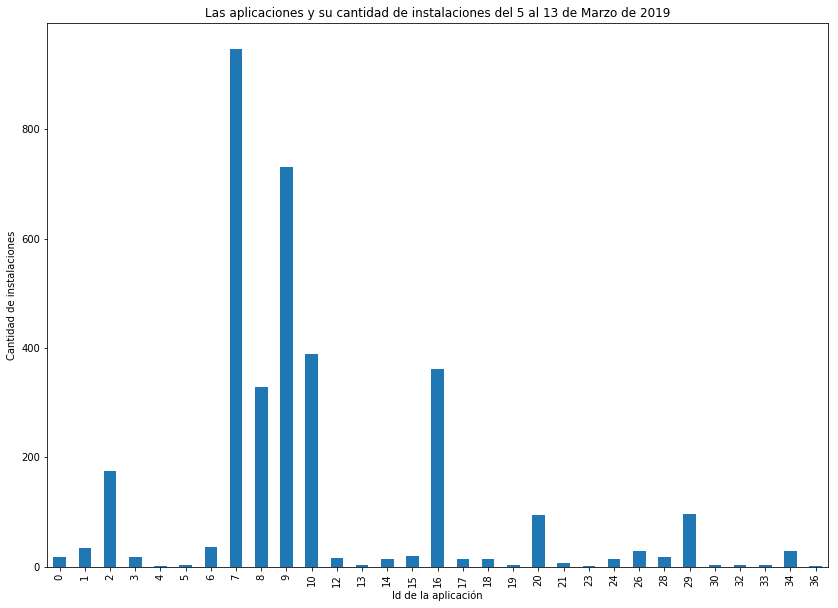

In [54]:
plot = installs.groupby('application_id').agg({'cant_installs': 'count'}).plot(kind = 'bar', figsize = (14,10), legend = False)
plot.set_ylabel("Cantidad de instalaciones")
plot.set_xlabel("Id de la aplicación")
plot.set_title("Las aplicaciones y su cantidad de instalaciones del 5 al 13 de Marzo de 2019")

### ¿Cuáles fueron las dos aplicaciones con más instalaciones por hora?

In [22]:
installs['hora'] = installs['created'].dt.hour

In [23]:
installs_group = installs.groupby(['hora','application_id']).agg({'cant_installs':'count'})

In [55]:
max_installs_hora = installs_group.sort_values(by = 'cant_installs', ascending = False).groupby(level = 0).head(2)\
.sort_values(by = 'hora', ascending = True).reset_index()

In [38]:
max_installs_hora

,hora,application_id,cant_installs
0,0,9,38
1,0,7,49
2,1,7,66
3,1,9,29
4,2,7,43
5,2,9,42
6,3,7,29
7,3,9,25
8,4,7,28
9,4,9,12


In [42]:
colours = {2: 'blue', 7: 'green', 9: 'black', 10: 'red'}

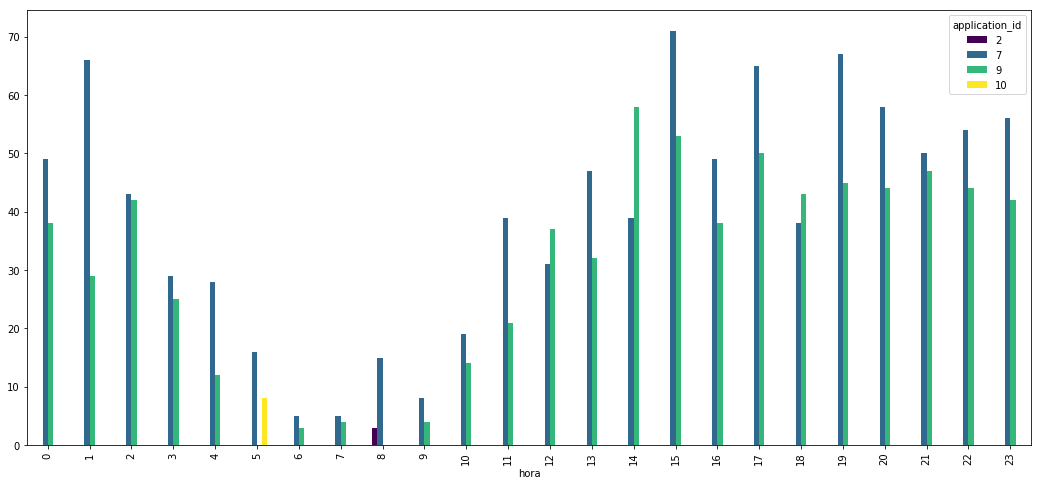

In [60]:
max_installs_hora.pivot(index='hora', columns='application_id', values='cant_installs').plot(kind='bar', figsize = (18,8), colormap='viridis')